In [1]:
from sklearn import metrics,svm, datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
import warnings
warnings.filterwarnings("ignore")

In [2]:
import MCC_F1_funcs as M

In [3]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Add noise to features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# making the dataset imbalanced
X, y = make_imbalance(X, y,sampling_strategy={0: 200, 1:12},random_state=42)

#  split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.5,
                                                    random_state=random_state)

# Create classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [4]:
mcc,f1,thresholds = M.mcc_f1(y_test,y_score)

MCC_F1_Met,T_index = M.MCC_F1_Metric(mcc,f1,thresholds)


MCC-F1 metric = 0.48 Best Threshold = -0.58


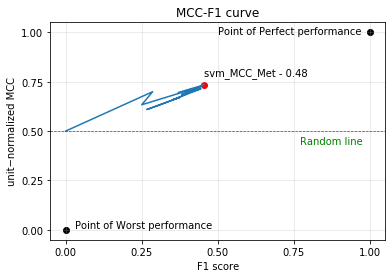

In [5]:
M.plotting(mcc,f1,thresholds,MCC_F1_Met,T_index,total_plots = 1,ax = 1,classifer_name ='svm')

---